In [2]:
import numpy as np
import xarray as xr
import pandas as pd 
import seaborn as sns
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt 

In [61]:
with xr.open_dataset('./result/fish/nc/fish_1000a_dt_0.5_dx_500_MB_8.3_OFF_cubic_spline.nc') as src: 
    # correct for minimum ice thickness
    src["depth"] = xr.where(src.depth <= 10, 0, src.depth)
    # apply sigma coordinate transform for vertical coordinate
    src["Z"]     = src.zbed + src.Z * src.height 
    # Calculate the magnitude of the velocity vectors
    src['vel_m'] = np.sqrt(src['velocity 1']**2 + src['velocity 2']**2)    
    
Vol = src.height.isel(coord_2=-1).integrate("coord_1") /\
      src.height.isel(coord_2=-1).isel(t=0).integrate("coord_1")

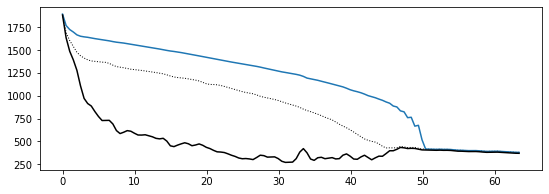

In [62]:
fig, ax = plt.subplots(figsize=(9,3))

ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).Z,
        color='k', ls=':', lw=1.0, label=r'$z_{\rm s}(t=0)$')


ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=-7,coord_2=-1).Z,
        color='tab:blue',
        label="Cuffey and Paterson, (2010)")

ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).zbed,
        color='k', label=r'$z_{\rm b}$ - Flowline B')

In [63]:
Vol.t

<xarray.DataArray 't' (t: 2001)>
array([5.0000e-01, 1.0000e+00, 1.5000e+00, ..., 9.9950e+02, 1.0000e+03,
       1.0005e+03], dtype=float32)
Coordinates:
    coord_2  float32 1.0
  * t        (t) float32 0.5 1.0 1.5 2.0 2.5 ... 998.5 999.0 999.5 1e+03 1e+03

Text(0.5, 0, 'Time (years)')

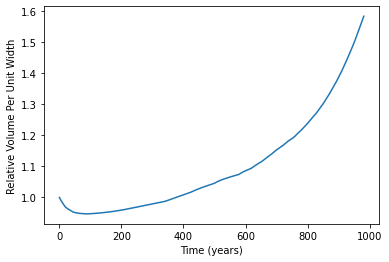

In [64]:
fig, ax = plt.subplots()

ax.plot(Vol.t[:-40], Vol[:-40])

ax.set_ylabel('Relative Volume Per Unit Width')
ax.set_xlabel('Time (years)')

In [65]:
print('Volume(t={:.0f}) : {:.3f}'.format(Vol.t[-1].values, Vol[-1].values))

Volume(t=1000) : 1.645


(1e-07, 0.004282308738701147)

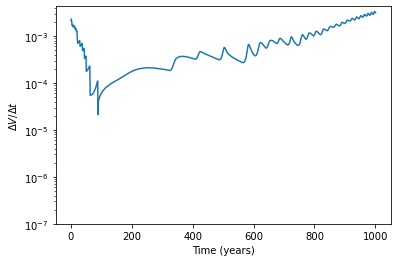

In [66]:
fig, ax = plt.subplots()

ax.plot(Vol.t, np.abs(Vol.differentiate('t')))

ax.set_ylabel('$\Delta V / \Delta t$')
ax.set_xlabel('Time (years)')
ax.set_yscale('log')

ax.set_ylim(1e-7, None)

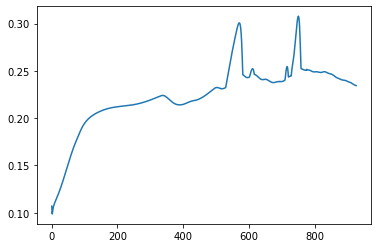

In [67]:
plt.plot(src.t[:-150], src.vel_m.max(dim=('coord_1', 'coord_2'))[:-150]*(1/500))
#plt.yscale('log')

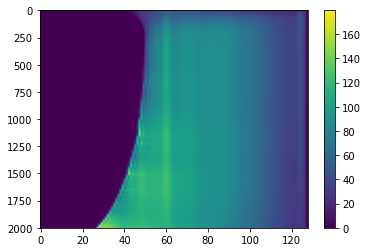

In [69]:
plt.imshow(src.vel_m.isel(coord_2=-1), aspect='auto');
plt.colorbar()

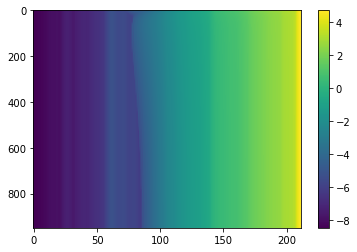

In [27]:
plt.imshow(src["zs accumulation flux 2"].isel(coord_2=-1, t=slice(0,-50)), aspect='auto')
plt.colorbar()

